In [1]:
import fastsolver as fs
import numpy as np


matrix = fs.SparseMatrix(1, 1)
fs.read_matrix_market("../data/bcsstk01/bcsstk01.mtx", matrix)
# Generate a random exact solution

x_ext = fs.Vector(np.random.rand(matrix.cols()))
# # Generate a random right-hand side
b = matrix * x_ext
x = fs.Vector(matrix.cols())
# # Solve the system using GMRES
gmres = fs.GMRES()
# gmres.enablePreconditioner()

max_iter = 100
krylov_dim = 48
tol = 1e-20
gmres.solve(matrix, b, x, max_iter, krylov_dim, tol)

M: 48 N: 48 L: 224
Matrix created 48 48
Initial residual norm: 3.99333e+09
Residual norm after restart: 1.42468e+08 
Residual norm after restart: 2.3635e+07 
Residual norm after restart: 1.74302e+07 
Residual norm after restart: 1.44054e+07 
Residual norm after restart: 1.24982e+07 
Residual norm after restart: 1.12004e+07 
Residual norm after restart: 1.02876e+07 
Residual norm after restart: 9.64414e+06 
Residual norm after restart: 9.19406e+06 
Residual norm after restart: 8.88127e+06 
Residual norm after restart: 8.6637e+06 
Residual norm after restart: 8.51097e+06 
Residual norm after restart: 8.40195e+06 
Residual norm after restart: 8.32222e+06 
Residual norm after restart: 8.26241e+06 
Residual norm after restart: 8.21637e+06 
Residual norm after restart: 8.18009e+06 
Residual norm after restart: 8.15068e+06 
Residual norm after restart: 8.12622e+06 
Residual norm after restart: 8.1055e+06 
Residual norm after restart: 8.08759e+06 
Residual norm after restart: 8.07176e+06 
Resi

In [2]:
x = fs.Vector(matrix.cols())
# # Solve the system using GMRES
gmres = fs.GMRES()
gmres.enablePreconditioner()
gmres.solve(matrix, b, x, max_iter, krylov_dim, tol)

Initial residual norm: 3.86319
Residual norm after restart: 3.57238e-15 
Residual norm after restart: 2.80453e-15 
Residual norm after restart: 3.47985e-15 
Residual norm after restart: 1.19433 
Residual norm after restart: 1.54861e-15 
Residual norm after restart: 0.524201 
Residual norm after restart: 5.33829e-15 
Residual norm after restart: 2.07822 
Residual norm after restart: 3.8578e-15 
Residual norm after restart: 1.62876 
Residual norm after restart: 3.48109e-15 
Residual norm after restart: 1.8065 
Residual norm after restart: 6.91106e-15 
Residual norm after restart: 2.71631 
Residual norm after restart: 5.14938e-15 
Residual norm after restart: 1.56387 
Residual norm after restart: 4.4656e-15 
Residual norm after restart: 1.43945 
Residual norm after restart: 6.06215e-15 
Residual norm after restart: 1.98463 
Residual norm after restart: 2.73637e-15 
Residual norm after restart: 0.746588 
Residual norm after restart: 1.25624e-15 
Residual norm after restart: 0.00878506 
Res

In [3]:
res='''M: 48 N: 48 L: 224
Matrix created 48 48
Initial residual norm: 7.34517e+09
Residual norm after restart: 3.31605e+08 
Residual norm after restart: 8.1323e+07 
Residual norm after restart: 4.62118e+07 
Residual norm after restart: 3.45267e+07 
Residual norm after restart: 2.89028e+07 
Residual norm after restart: 2.53827e+07 
Residual norm after restart: 2.30251e+07 
Residual norm after restart: 2.14044e+07 
Residual norm after restart: 2.02891e+07 
Residual norm after restart: 1.95259e+07 
Residual norm after restart: 1.90051e+07 
Residual norm after restart: 1.8648e+07 
Residual norm after restart: 1.83996e+07 
Residual norm after restart: 1.82228e+07 
Residual norm after restart: 1.80937e+07 
Residual norm after restart: 1.79968e+07 
Residual norm after restart: 1.79221e+07 
Residual norm after restart: 1.78626e+07 
Residual norm after restart: 1.78139e+07 
Residual norm after restart: 1.77728e+07 
Residual norm after restart: 1.77373e+07 
Residual norm after restart: 1.77058e+07 
Residual norm after restart: 1.76773e+07 
Residual norm after restart: 1.76509e+07 
Residual norm after restart: 1.76262e+07 
Residual norm after restart: 1.76026e+07 
Residual norm after restart: 1.758e+07 
Residual norm after restart: 1.7558e+07 
Residual norm after restart: 1.75365e+07 
Residual norm after restart: 1.75154e+07 
Residual norm after restart: 1.74945e+07 
Residual norm after restart: 1.74739e+07 
Residual norm after restart: 1.74535e+07 
Residual norm after restart: 1.74332e+07 
Residual norm after restart: 1.7413e+07 
Residual norm after restart: 1.73928e+07 
Residual norm after restart: 1.73728e+07 
Residual norm after restart: 1.73528e+07 
Residual norm after restart: 1.73329e+07 
Residual norm after restart: 1.7313e+07 
Residual norm after restart: 1.72931e+07 
Residual norm after restart: 1.72733e+07 
Residual norm after restart: 1.72535e+07 
Residual norm after restart: 1.72337e+07 
Residual norm after restart: 1.7214e+07 
Residual norm after restart: 1.71943e+07 
Residual norm after restart: 1.71746e+07 
Residual norm after restart: 1.7155e+07 
Residual norm after restart: 1.71354e+07 
Residual norm after restart: 1.71158e+07 
Residual norm after restart: 1.70962e+07 
Residual norm after restart: 1.70767e+07 
Residual norm after restart: 1.70572e+07 
Residual norm after restart: 1.70377e+07 
Residual norm after restart: 1.70182e+07 
Residual norm after restart: 1.69988e+07 
Residual norm after restart: 1.69794e+07 
Residual norm after restart: 1.696e+07 
Residual norm after restart: 1.69407e+07 
Residual norm after restart: 1.69214e+07 
Residual norm after restart: 1.69021e+07 
Residual norm after restart: 1.68828e+07 
Residual norm after restart: 1.68636e+07 
Residual norm after restart: 1.68443e+07 
Residual norm after restart: 1.68252e+07 
Residual norm after restart: 1.6806e+07 
Residual norm after restart: 1.67869e+07 
Residual norm after restart: 1.67677e+07 
Residual norm after restart: 1.67487e+07 
Residual norm after restart: 1.67296e+07 
Residual norm after restart: 1.67106e+07 
Residual norm after restart: 1.66916e+07 
Residual norm after restart: 1.66726e+07 
Residual norm after restart: 1.66536e+07 
Residual norm after restart: 1.66347e+07 
Residual norm after restart: 1.66158e+07 
Residual norm after restart: 1.65969e+07 
Residual norm after restart: 1.6578e+07 
Residual norm after restart: 1.65592e+07 
Residual norm after restart: 1.65404e+07 
Residual norm after restart: 1.65216e+07 
Residual norm after restart: 1.65029e+07 
Residual norm after restart: 1.64842e+07 
Residual norm after restart: 1.64655e+07 
Residual norm after restart: 1.64468e+07 
Residual norm after restart: 1.64281e+07 
Residual norm after restart: 1.64095e+07 
Residual norm after restart: 1.63909e+07 
Residual norm after restart: 1.63723e+07 
Residual norm after restart: 1.63538e+07 
Residual norm after restart: 1.63353e+07 
Residual norm after restart: 1.63168e+07 
Residual norm after restart: 1.62983e+07 
Residual norm after restart: 1.62798e+07 
Residual norm after restart: 1.62614e+07 
Residual norm after restart: 1.6243e+07 
Residual norm after restart: 1.62246e+07 
Residual norm after restart: 1.62063e+07 
Residual norm after restart: 1.6188e+07 
Residual norm after restart: 1.61697e+07 
Reached maximum iterations without convergence.
'''

In [4]:
res_pre = '''M: 48 N: 48 L: 224
Matrix created 48 48
Initial residual norm: 7.4704
Residual norm after restart: 3.73815e-15 
Residual norm after restart: 2.15337e-15 
Residual norm after restart: 3.6527e-15 
Residual norm after restart: 0.414502 
Residual norm after restart: 4.75795e-15 
Residual norm after restart: 2.00392 
Residual norm after restart: 4.52704e-15 
Residual norm after restart: 3.23947 
Residual norm after restart: 1.08832e-14 
Residual norm after restart: 33.8819 
Residual norm after restart: 2.47034e-14 
Residual norm after restart: 35.5077 
Residual norm after restart: 4.20003e-14 
Residual norm after restart: 24.1708 
Residual norm after restart: 3.09516e-14 
Residual norm after restart: 17.2315 
Residual norm after restart: 2.73563e-14 
Residual norm after restart: 15.1089 
Residual norm after restart: 2.18391e-14 
Residual norm after restart: 9.32379 
Residual norm after restart: 1.29113e-14 
Residual norm after restart: 6.18955 
Residual norm after restart: 1.68857e-14 
Residual norm after restart: 0.188593 
Residual norm after restart: 4.52784e-15 
Residual norm after restart: 1.94418 
Residual norm after restart: 4.31485e-15 
Residual norm after restart: 1.10939 
Residual norm after restart: 9.64895e-15 
Residual norm after restart: 1.06449 
Residual norm after restart: 4.0635e-15 
Residual norm after restart: 1.09101 
Residual norm after restart: 7.64315e-15 
Residual norm after restart: 1.71004 
Residual norm after restart: 4.15755e-15 
Residual norm after restart: 0.797915 
Residual norm after restart: 2.55207e-15 
Residual norm after restart: 0.00356861 
Residual norm after restart: 5.76931e-16 
Residual norm after restart: 0.101506 
Residual norm after restart: 1.01758e-15 
Residual norm after restart: 0.194794 
Residual norm after restart: 1.05831e-15 
Residual norm after restart: 0.13949 
Residual norm after restart: 1.04018e-15 
Residual norm after restart: 0.145779 
Residual norm after restart: 1.02381e-15 
Residual norm after restart: 0.240519 
Residual norm after restart: 1.55074e-15 
Residual norm after restart: 0.265914 
Residual norm after restart: 1.56979e-15 
Residual norm after restart: 0.294061 
Residual norm after restart: 1.56826e-15 
Residual norm after restart: 0.0908639 
Residual norm after restart: 5.51527e-16 
Residual norm after restart: 0.0301654 
Residual norm after restart: 2.36744e-16 
Residual norm after restart: 0.0347016 
Residual norm after restart: 4.31941e-16 
Residual norm after restart: 0.0615567 
Residual norm after restart: 4.13527e-16 
Residual norm after restart: 0.0589655 
Residual norm after restart: 4.52043e-16 
Residual norm after restart: 0.0273733 
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
KrylovUpdate : 1
Residual norm after restart: 3.27571e-16 
Reached maximum iterations without convergence.
'''

In [5]:
res = res.split('\n')
res = [float(i.replace("Residual norm after restart: ", "")) for i in res if i.startswith('Residual')]
res_pre = res_pre.split('\n')
res_pre = [float(i.replace("Residual norm after restart: ", "")) for i in res_pre if i.startswith('Residual')] 

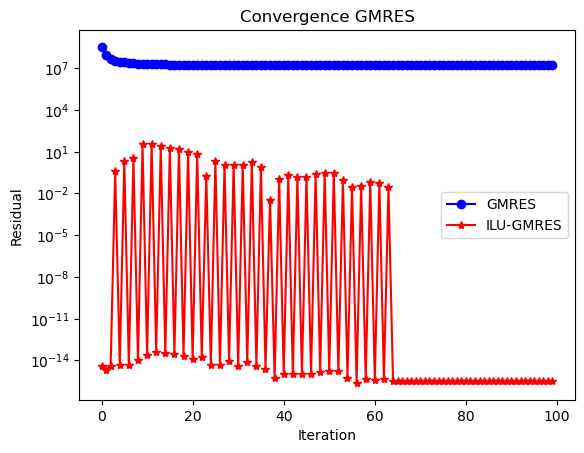

In [6]:
import matplotlib.pyplot as plt

plt.plot(res[:100], '-o', color='blue', label='GMRES')
plt.plot(res_pre[:100], '-*', color='red', label='ILU-GMRES')
plt.yscale('log')
plt.title('Convergence GMRES')
plt.ylabel('Residual')
plt.xlabel('Iteration')
plt.legend()
plt.show()